In [5]:
import matplotlib.pyplot as plt
import numpy as np

from train import game, run_n_games
from tic_tac_toe_environment import TicTacToeEnvironment
from agent import Agent
from tqdm import tqdm
import numpy as np

In [35]:
env = TicTacToeEnvironment(Agent('o'))
agent = Agent('x', learning_rate=1., eps=.3)

In [36]:
def count_non_zero_q(qtable):
    res = 0
    for v in qtable.values():
        for q in v.values():
            res += 1 if q != 0 else 0
    return res

In [37]:
xcount = 0
ocount = 0
ties_count = 0
n_eps = 1_000_000
q_n = []
for i in tqdm(range(n_eps)):
    res = game(env, agent, train=True)
    if i % 10000:
        q_n.append(count_non_zero_q(agent.qtable))
    match res:
        case 'x':
            xcount += 1
        case 'o':
            ocount += 1
        case 'tie':
            ties_count += 1
        case _:
            print(res)

  4%|▍         | 43234/1000000 [2:11:48<98:45:11,  2.69it/s] 

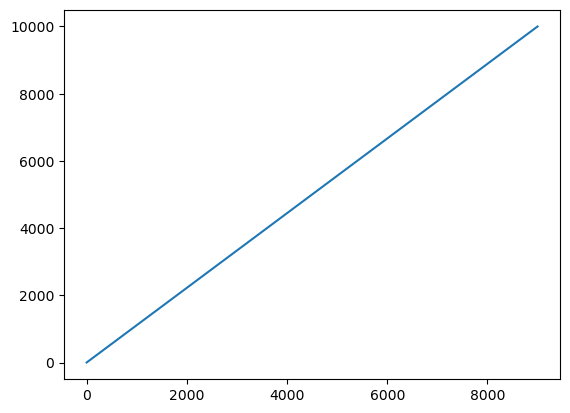

In [28]:
plt.plot(q_n)

In [29]:
agent.qtable

{('',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''): {(0, 0): 0.0,
  (0, 1): 0.0,
  (0, 2): 0.0,
  (0, 3): 0.0,
  (0, 4): 0.0,
  (1, 0): 0.0,
  (1, 1): 0.0,
  (1, 2): 0.0,
  (1, 3): 0.0,
  (1, 4): 0.0,
  (2, 0): 0.0,
  (2, 1): 0.0,
  (2, 2): 0.0,
  (2, 3): 0.0,
  (2, 4): 0.0,
  (3, 0): 0.0,
  (3, 1): 0.0,
  (3, 2): 0.0,
  (3, 3): 0.0,
  (3, 4): 0.0,
  (4, 0): 0.0,
  (4, 1): 0.0,
  (4, 2): 0.0,
  (4, 3): 0.0,
  (4, 4): 0.0},
 ('',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'x',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'o'): {(0, 0): 0.0,
  (0, 1): 0,
  (0, 2): 0.0,
  (0, 3): 0.0,
  (0, 4): 0.0,
  (1, 0): 0.0,
  (1, 1): 0,
  (1, 2): 0.0,
  (1, 4): 0,
  (2, 0): 0.0,
  (2, 1): 0,
  (2, 2): 0.0,
  (2, 3): 0.0,
  (2, 4): 0,
  (3, 0): 0.0,
  (3, 1): 0.0,
  (3, 2): 0,
  (3, 3): 0.0,
  (3, 4): 0.0,
  (4, 0): 0.0,
  (4, 1): 0,
  (4, 2): 0.0,
  (4, 

{'x': 3201, 'o': 2620, 'tie': 4179}

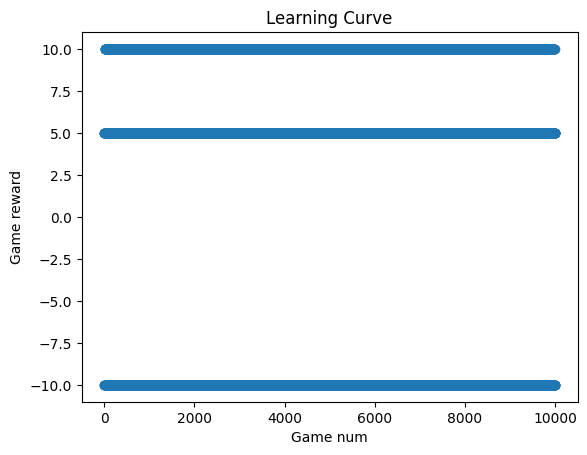

In [4]:
env, agent, stats = run_n_games(10000, 'o', train=True)
stats

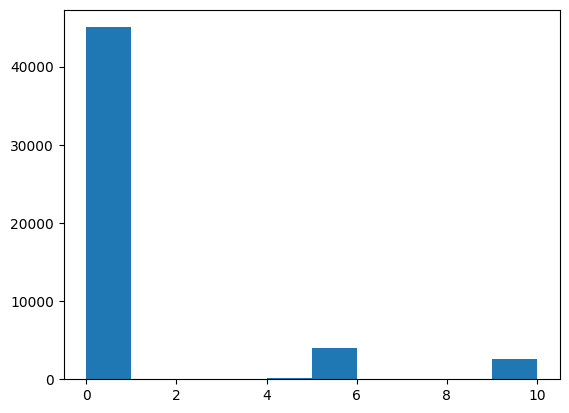

In [3]:
plt.hist([max(v.values()) for v in agent.qtable.values()]);

In [7]:
len(agent.qtable), np.mean([len(item) for item in agent.qtable.values()])

(51835, 6.8681971640783255)